<a href="https://colab.research.google.com/github/souramay/Darksoul/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

First five rows of the dataset:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Mean Squared Error (MSE): 4.0826
R² Score: 0.9890


<ipython-input-1-f3ec083da620>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Extracurricular Activities'] = X['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


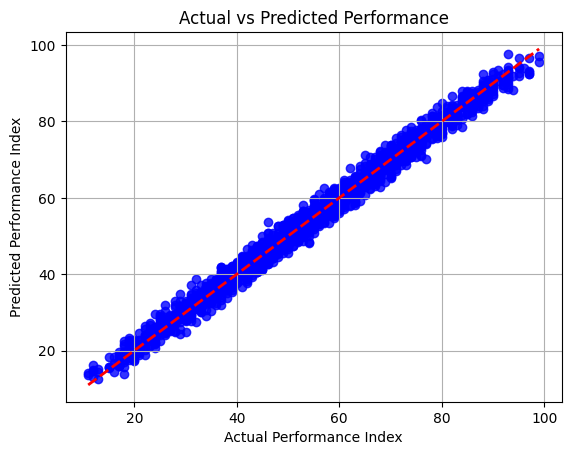

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')  # Update with your dataset path
print("First five rows of the dataset:")
print(data.head())

X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
          'Sleep Hours', 'Sample Question Papers Practiced']]


X['Extracurricular Activities'] = X['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


y = data['Performance Index'].values


X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std


X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)


X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


beta = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)


y_pred = X_test_b @ beta


mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


plt.scatter(y_test, y_pred, alpha=0.8, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance")
plt.grid()
plt.show()


np.savetxt("beta_coefficients.txt", beta, header="Beta Coefficients")